In [39]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("data/energydata_complete.csv")

In [41]:
ts = df["Appliances"]

In [42]:
ts.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

In [43]:
dates = pd.to_datetime(df.date)

In [44]:
series = np.asarray(ts.values)

In [45]:
time = np.arange(series.shape[0])

In [46]:
def plot_series(time, series, format = "-", start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)

## Forecasting with Machine Learning

In [47]:
dataset = tf.data.Dataset.from_tensor_slices(series) #instead of random values we are doing it with the data
dataset = dataset.window(5,shift = 1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size = 20000) #IID gd works best #buffersize must be greater or equal to the number of examples
dataset = dataset.batch(32).prefetch(1) # you probably will want bigger batchs like 32 / 64
for x, y in dataset:
    print(x.numpy(), y.numpy())

[[100 100 100 100]
 [ 50  40  40  50]
 [ 40  60  40  40]
 [130 120  90  40]
 [ 50  40  50  50]
 [ 50  50  60  50]
 [ 40  50  30  70]
 [240 240  80  60]
 [ 60  50  50  50]
 [ 50  50  50  80]
 [ 80  80 200 110]
 [ 80  60  70  60]
 [ 50  50  50  50]
 [ 60  50  60  50]
 [ 90  90  80  70]
 [ 60  60  50  50]
 [ 50  40  50  30]
 [420 240  70  70]
 [ 70  50  60  40]
 [ 40  50  50  70]
 [110 110 140 130]
 [ 40  50  50  60]
 [ 40  30  20  30]
 [ 60  70  40  40]
 [ 60  90  90  80]
 [ 40  40  50  40]
 [ 80  70  80  60]
 [110 110 100 100]
 [210 140 100 120]
 [170 330 210 310]
 [100 180 510 350]
 [ 40  60  50  60]] [[100]
 [ 50]
 [ 60]
 [ 70]
 [ 70]
 [ 60]
 [ 50]
 [ 50]
 [ 50]
 [ 50]
 [110]
 [ 40]
 [ 40]
 [ 70]
 [ 80]
 [ 60]
 [ 50]
 [ 70]
 [ 50]
 [ 60]
 [180]
 [ 60]
 [ 30]
 [ 40]
 [ 90]
 [ 20]
 [ 60]
 [100]
 [ 90]
 [350]
 [310]
 [ 70]]
[[510 590 190 100]
 [180 180 120 140]
 [ 50  50  50  50]
 [ 90 100  90  90]
 [ 70  70 120  90]
 [ 60  50  50  70]
 [ 60  60  70  40]
 [ 60  60  50  50]
 [ 70  60  60 

 [120]]
[[ 50  50  50  50]
 [ 60  30  20  30]
 [ 40  40  50  40]
 [ 70  80  70  80]
 [ 30  20  60  50]
 [ 50  60  50  60]
 [ 60  70  50  60]
 [ 60  60  60  70]
 [ 30  70  70  50]
 [ 60  50  70  50]
 [110 110 110  80]
 [ 50  30  40  70]
 [ 30  60  50  50]
 [150 120 130 170]
 [ 60  60  80  70]
 [ 50  50  60  40]
 [ 80  70 100 100]
 [ 40  50  60  60]
 [100 100 100  80]
 [ 90 100 110 110]
 [ 70  80  60  50]
 [ 50  60  50  60]
 [ 50  30  30  40]
 [110  90  90 350]
 [160 140 130 130]
 [ 20  30  40  50]
 [ 90  80  80  80]
 [ 50  90 410 320]
 [110 130 110 110]
 [130 140 120 130]
 [600 330 350 320]
 [ 50  50  50  60]] [[ 40]
 [ 50]
 [ 40]
 [ 70]
 [ 70]
 [ 80]
 [ 50]
 [ 70]
 [ 60]
 [ 60]
 [ 90]
 [ 80]
 [ 50]
 [440]
 [ 50]
 [ 50]
 [ 90]
 [ 50]
 [210]
 [100]
 [ 50]
 [ 60]
 [ 40]
 [530]
 [130]
 [ 80]
 [ 80]
 [310]
 [300]
 [140]
 [420]
 [ 60]]
[[ 50  50  50  50]
 [ 70  80  60  70]
 [ 50  60  50  60]
 [460 340 310 120]
 [610 390 320 290]
 [ 70  80  80  80]
 [ 50  60  60  50]
 [ 60  60  60 190]
 [ 50 

In [48]:
def window_dataset(series, window_size, batch_size = 32, shuffle_buffer = 20000):
    dataset = tf.data.Dataset.from_tensor_slices(series) #instead of random values we are doing it with the data
    dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.shuffle(buffer_size = shuffle_buffer) #IID gd works best #buffersize must be greater or equal to the number of examples
    dataset = dataset.batch(batch_size).prefetch(1) # you probably will want bigger batchs like 32 / 64
    return dataset

In [56]:
split_time = int(series.shape[0] * 0.8)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [57]:
window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.Adam(learning_rate=1e-5)

model.compile(loss = keras.losses.mean_squared_error,
             optimizer = optimizer,
             metrics = ["mse"])
early_stopping = keras.callbacks.EarlyStopping(patience = 10)
model.fit(train_set, epochs = 500,
         validation_data = valid_set,
         callbacks = [early_stopping])

Epoch 1/500
493/493 [==============================] - 3s 5ms/step - loss: 48531.0228 - mse: 48519.9766 - val_loss: 36346.7519 - val_mse: 36207.2227
Epoch 2/500
493/493 [==============================] - 2s 4ms/step - loss: 44277.2231 - mse: 44317.3047 - val_loss: 32728.6346 - val_mse: 32753.6660
Epoch 3/500
493/493 [==============================] - 2s 5ms/step - loss: 40687.4316 - mse: 40728.4023 - val_loss: 30022.7330 - val_mse: 29825.9551
Epoch 4/500
493/493 [==============================] - 2s 4ms/step - loss: 37728.9162 - mse: 37685.7344 - val_loss: 27294.4010 - val_mse: 27345.2695
Epoch 5/500
493/493 [==============================] - 2s 4ms/step - loss: 35107.0783 - mse: 35105.9727 - val_loss: 25279.4246 - val_mse: 25245.7969
Epoch 6/500
493/493 [==============================] - 2s 4ms/step - loss: 32921.4297 - mse: 32938.9180 - val_loss: 23435.9103 - val_mse: 23508.0293
Epoch 7/500
493/493 [==============================] - 2s 4ms/step - loss: 31139.1598 - mse: 31156.0898 - 

493/493 [==============================] - 2s 5ms/step - loss: 14510.7913 - mse: 14520.5273 - val_loss: 10446.4747 - val_mse: 10481.7861
Epoch 56/500
493/493 [==============================] - 2s 4ms/step - loss: 14366.5481 - mse: 14361.1240 - val_loss: 10347.4862 - val_mse: 10377.1221
Epoch 57/500
493/493 [==============================] - 2s 4ms/step - loss: 14194.2081 - mse: 14204.9492 - val_loss: 10283.1233 - val_mse: 10275.2783
Epoch 58/500
493/493 [==============================] - 2s 4ms/step - loss: 14058.6768 - mse: 14053.2832 - val_loss: 10138.0338 - val_mse: 10177.2871
Epoch 59/500
493/493 [==============================] - 2s 4ms/step - loss: 13928.2432 - mse: 13904.3252 - val_loss: 10053.2528 - val_mse: 10079.4463
Epoch 60/500
493/493 [==============================] - 2s 4ms/step - loss: 13827.9438 - mse: 13758.1836 - val_loss: 9987.5913 - val_mse: 9983.4961
Epoch 61/500
493/493 [==============================] - 2s 4ms/step - loss: 13613.6402 - mse: 13615.4316 - val_loss

493/493 [==============================] - 2s 4ms/step - loss: 9168.0132 - mse: 9176.7129 - val_loss: 6904.9404 - val_mse: 6884.8706
Epoch 111/500
493/493 [==============================] - 2s 4ms/step - loss: 9130.4146 - mse: 9120.8906 - val_loss: 6813.4173 - val_mse: 6845.5493
Epoch 112/500
493/493 [==============================] - 2s 4ms/step - loss: 9068.4001 - mse: 9065.9814 - val_loss: 6783.4018 - val_mse: 6806.4590
Epoch 113/500
493/493 [==============================] - 2s 4ms/step - loss: 9012.6945 - mse: 9012.0322 - val_loss: 6764.2959 - val_mse: 6767.7773
Epoch 114/500
493/493 [==============================] - 2s 4ms/step - loss: 8960.7021 - mse: 8959.6025 - val_loss: 6721.7862 - val_mse: 6731.0454
Epoch 115/500
493/493 [==============================] - 2s 4ms/step - loss: 8902.0253 - mse: 8907.8018 - val_loss: 6730.3745 - val_mse: 6694.5356
Epoch 116/500
493/493 [==============================] - 2s 5ms/step - loss: 8852.3586 - mse: 8857.0264 - val_loss: 6662.4670 - val_

Epoch 166/500
493/493 [==============================] - 2s 4ms/step - loss: 7068.9635 - mse: 7069.2627 - val_loss: 5359.6352 - val_mse: 5358.0752
Epoch 167/500
493/493 [==============================] - 2s 5ms/step - loss: 7037.8679 - mse: 7043.5840 - val_loss: 5353.1734 - val_mse: 5339.4756
Epoch 168/500
493/493 [==============================] - 2s 4ms/step - loss: 7011.4282 - mse: 7018.3506 - val_loss: 5355.2334 - val_mse: 5320.8516
Epoch 169/500
493/493 [==============================] - 2s 4ms/step - loss: 6991.7813 - mse: 6993.1543 - val_loss: 5311.1775 - val_mse: 5302.4819
Epoch 170/500
493/493 [==============================] - 2s 5ms/step - loss: 6967.3287 - mse: 6968.5840 - val_loss: 5289.4877 - val_mse: 5283.9932
Epoch 171/500
493/493 [==============================] - 2s 4ms/step - loss: 6943.3410 - mse: 6944.1860 - val_loss: 5243.4990 - val_mse: 5265.7456
Epoch 172/500
493/493 [==============================] - 2s 4ms/step - loss: 6922.4163 - mse: 6920.1499 - val_loss: 52

Epoch 222/500
493/493 [==============================] - 2s 4ms/step - loss: 5979.7459 - mse: 5983.2534 - val_loss: 4543.4686 - val_mse: 4559.7397
Epoch 223/500
493/493 [==============================] - 2s 4ms/step - loss: 5963.3253 - mse: 5969.0122 - val_loss: 4541.1617 - val_mse: 4549.3647
Epoch 224/500
493/493 [==============================] - 2s 4ms/step - loss: 5951.7600 - mse: 5954.5312 - val_loss: 4532.9046 - val_mse: 4539.3779
Epoch 225/500
493/493 [==============================] - 2s 4ms/step - loss: 5934.4039 - mse: 5940.6821 - val_loss: 4517.6808 - val_mse: 4528.7310
Epoch 226/500
493/493 [==============================] - 2s 4ms/step - loss: 5927.6138 - mse: 5926.9097 - val_loss: 4497.9184 - val_mse: 4518.2988
Epoch 227/500
493/493 [==============================] - 2s 4ms/step - loss: 5920.4584 - mse: 5913.1001 - val_loss: 4490.7839 - val_mse: 4508.6719
Epoch 228/500
493/493 [==============================] - 2s 4ms/step - loss: 5897.9003 - mse: 5899.2886 - val_loss: 44

Epoch 278/500
493/493 [==============================] - 2s 5ms/step - loss: 5358.7767 - mse: 5364.3901 - val_loss: 4111.3189 - val_mse: 4111.6948
Epoch 279/500
493/493 [==============================] - 2s 4ms/step - loss: 5350.5611 - mse: 5356.4385 - val_loss: 4096.5105 - val_mse: 4106.0859
Epoch 280/500
493/493 [==============================] - 2s 4ms/step - loss: 5346.3911 - mse: 5348.5327 - val_loss: 4148.9171 - val_mse: 4100.1611
Epoch 281/500
493/493 [==============================] - 2s 4ms/step - loss: 5345.7560 - mse: 5340.5981 - val_loss: 4135.0227 - val_mse: 4094.6577
Epoch 282/500
493/493 [==============================] - 2s 4ms/step - loss: 5335.8150 - mse: 5332.7935 - val_loss: 4072.8052 - val_mse: 4088.8679
Epoch 283/500
493/493 [==============================] - 2s 4ms/step - loss: 5319.7855 - mse: 5324.9619 - val_loss: 4064.5273 - val_mse: 4083.2397
Epoch 284/500
493/493 [==============================] - 2s 4ms/step - loss: 5311.7422 - mse: 5317.3345 - val_loss: 40

Epoch 334/500
493/493 [==============================] - 2s 4ms/step - loss: 5014.0660 - mse: 5019.3779 - val_loss: 3861.4220 - val_mse: 3866.0610
Epoch 335/500
493/493 [==============================] - 2s 4ms/step - loss: 5013.1124 - mse: 5014.7759 - val_loss: 4004.4691 - val_mse: 3863.3430
Epoch 336/500
493/493 [==============================] - 2s 4ms/step - loss: 5006.2233 - mse: 5010.2871 - val_loss: 3906.8970 - val_mse: 3859.7649
Epoch 337/500
493/493 [==============================] - 2s 5ms/step - loss: 5004.8888 - mse: 5005.7881 - val_loss: 3854.1293 - val_mse: 3856.6536
Epoch 338/500
493/493 [==============================] - 2s 5ms/step - loss: 4999.5486 - mse: 5001.3789 - val_loss: 3851.5335 - val_mse: 3853.6870
Epoch 339/500
493/493 [==============================] - 2s 4ms/step - loss: 4996.9028 - mse: 4997.1152 - val_loss: 3885.4369 - val_mse: 3850.4705
Epoch 340/500
493/493 [==============================] - 2s 4ms/step - loss: 4987.4100 - mse: 4992.6978 - val_loss: 38

Epoch 390/500
493/493 [==============================] - 2s 5ms/step - loss: 4819.7165 - mse: 4824.4707 - val_loss: 3714.2625 - val_mse: 3729.5078
Epoch 391/500
493/493 [==============================] - 2s 4ms/step - loss: 4820.0997 - mse: 4821.9434 - val_loss: 3712.2246 - val_mse: 3727.6226
Epoch 392/500
493/493 [==============================] - 2s 4ms/step - loss: 4834.4491 - mse: 4819.3896 - val_loss: 3710.2096 - val_mse: 3725.9160
Epoch 393/500
493/493 [==============================] - 2s 4ms/step - loss: 4811.8846 - mse: 4816.6621 - val_loss: 3716.0832 - val_mse: 3724.4614
Epoch 394/500
493/493 [==============================] - 2s 4ms/step - loss: 4810.0088 - mse: 4814.2876 - val_loss: 3705.2371 - val_mse: 3722.0093
Epoch 395/500
493/493 [==============================] - 2s 4ms/step - loss: 4806.9785 - mse: 4811.8164 - val_loss: 3726.2029 - val_mse: 3720.6912
Epoch 396/500
493/493 [==============================] - 2s 4ms/step - loss: 4808.3532 - mse: 4809.3652 - val_loss: 37

Epoch 446/500
493/493 [==============================] - 2s 4ms/step - loss: 4724.2724 - mse: 4712.3687 - val_loss: 3658.0417 - val_mse: 3650.9182
Epoch 447/500
493/493 [==============================] - 2s 4ms/step - loss: 4706.1140 - mse: 4711.0112 - val_loss: 3633.3049 - val_mse: 3649.8369
Epoch 448/500
493/493 [==============================] - 2s 4ms/step - loss: 4704.4244 - mse: 4709.3506 - val_loss: 3662.3964 - val_mse: 3649.2798
Epoch 449/500
493/493 [==============================] - 2s 4ms/step - loss: 4708.5624 - mse: 4707.8838 - val_loss: 3643.5333 - val_mse: 3648.3171
Epoch 450/500
493/493 [==============================] - 2s 4ms/step - loss: 4701.7881 - mse: 4706.3862 - val_loss: 3633.5665 - val_mse: 3647.0093
Epoch 451/500
493/493 [==============================] - 2s 4ms/step - loss: 4716.5607 - mse: 4704.8726 - val_loss: 3652.3153 - val_mse: 3646.2227
Epoch 452/500
493/493 [==============================] - 2s 4ms/step - loss: 4700.2753 - mse: 4703.4453 - val_loss: 36

In [58]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w : w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    return model.predict(ds)

In [61]:
lin_forecast = model_forecast(
    model,
    series[split_time - window_size: -1],
    window_size)
lin_forecast = lin_forecast[:,0]

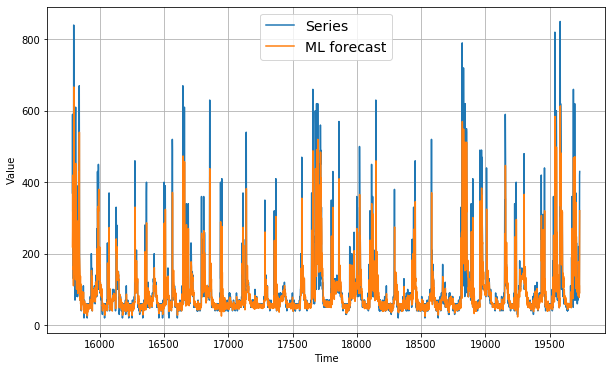

In [62]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, lin_forecast, label="ML forecast")

In [64]:
tf.keras.metrics.mse(x_valid, lin_forecast).numpy()

3767.861

In [65]:
tf.keras.metrics.mae(x_valid, lin_forecast).numpy()

27.226158

* we surpassed the naive approach, this is now our best performance yet

### Using two relu dense layers

In [67]:
window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model2 = keras.models.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.Adam(learning_rate=1e-5)

model2.compile(loss = keras.losses.mean_squared_error,
             optimizer = optimizer,
             metrics = ["mse"])
early_stopping = keras.callbacks.EarlyStopping(patience = 10)
model2.fit(train_set, epochs = 500,
         validation_data = valid_set,
         callbacks = [early_stopping])

Epoch 1/500
493/493 [==============================] - 3s 5ms/step - loss: 32268.3360 - mse: 32293.0996 - val_loss: 24311.7270 - val_mse: 24377.6406
Epoch 2/500
493/493 [==============================] - 2s 4ms/step - loss: 26645.3294 - mse: 26663.4141 - val_loss: 19843.9756 - val_mse: 19884.6992
Epoch 3/500
493/493 [==============================] - 2s 4ms/step - loss: 22168.0327 - mse: 22161.0117 - val_loss: 16274.8146 - val_mse: 16328.3711
Epoch 4/500
493/493 [==============================] - 2s 4ms/step - loss: 18733.5363 - mse: 18721.5332 - val_loss: 13749.8620 - val_mse: 13669.0918
Epoch 5/500
493/493 [==============================] - 2s 4ms/step - loss: 16209.1900 - mse: 16210.9502 - val_loss: 11747.1687 - val_mse: 11786.5391
Epoch 6/500
493/493 [==============================] - 2s 4ms/step - loss: 14500.5015 - mse: 14503.0967 - val_loss: 10514.5426 - val_mse: 10549.6523
Epoch 7/500
493/493 [==============================] - 2s 4ms/step - loss: 13407.2128 - mse: 13402.9336 - 

Epoch 57/500
493/493 [==============================] - 2s 5ms/step - loss: 6723.3274 - mse: 6726.0439 - val_loss: 4887.6574 - val_mse: 4860.5376
Epoch 58/500
493/493 [==============================] - 2s 4ms/step - loss: 6687.7144 - mse: 6692.4062 - val_loss: 4825.6122 - val_mse: 4842.5229
Epoch 59/500
493/493 [==============================] - 2s 5ms/step - loss: 6652.7447 - mse: 6659.5620 - val_loss: 4808.3261 - val_mse: 4824.3667
Epoch 60/500
493/493 [==============================] - 2s 5ms/step - loss: 6624.1677 - mse: 6627.1777 - val_loss: 4784.8871 - val_mse: 4807.4902
Epoch 61/500
493/493 [==============================] - 2s 4ms/step - loss: 6590.1688 - mse: 6595.4023 - val_loss: 4772.1397 - val_mse: 4790.7324
Epoch 62/500
493/493 [==============================] - 2s 4ms/step - loss: 6557.9459 - mse: 6564.6396 - val_loss: 4767.5581 - val_mse: 4772.2222
Epoch 63/500
493/493 [==============================] - 2s 4ms/step - loss: 6530.3505 - mse: 6533.5757 - val_loss: 4799.7423

493/493 [==============================] - 2s 4ms/step - loss: 5551.3534 - mse: 5550.3545 - val_loss: 4193.5470 - val_mse: 4206.9878
Epoch 114/500
493/493 [==============================] - 2s 5ms/step - loss: 5544.9220 - mse: 5537.9014 - val_loss: 4185.4542 - val_mse: 4199.2246
Epoch 115/500
493/493 [==============================] - 2s 4ms/step - loss: 5520.8347 - mse: 5525.2017 - val_loss: 4193.9389 - val_mse: 4192.5703
Epoch 116/500
493/493 [==============================] - 2s 4ms/step - loss: 5511.3255 - mse: 5512.9727 - val_loss: 4220.7446 - val_mse: 4186.1304
Epoch 117/500
493/493 [==============================] - 2s 4ms/step - loss: 5496.9956 - mse: 5500.5532 - val_loss: 4174.6942 - val_mse: 4180.0825
Epoch 118/500
493/493 [==============================] - 2s 4ms/step - loss: 5486.8431 - mse: 5488.8149 - val_loss: 4155.1218 - val_mse: 4173.9565
Epoch 119/500
493/493 [==============================] - 2s 5ms/step - loss: 5499.4525 - mse: 5476.8911 - val_loss: 4195.0867 - val_

Epoch 169/500
493/493 [==============================] - 2s 4ms/step - loss: 5072.4126 - mse: 5077.3589 - val_loss: 3942.3464 - val_mse: 3960.9492
Epoch 170/500
493/493 [==============================] - 2s 4ms/step - loss: 5068.4666 - mse: 5071.8369 - val_loss: 3941.7366 - val_mse: 3957.4812
Epoch 171/500
493/493 [==============================] - 2s 4ms/step - loss: 5061.6463 - mse: 5066.3545 - val_loss: 3940.0821 - val_mse: 3954.5776
Epoch 172/500
493/493 [==============================] - 2s 4ms/step - loss: 5056.5297 - mse: 5061.2324 - val_loss: 3948.4222 - val_mse: 3952.3970
Epoch 173/500
493/493 [==============================] - 2s 5ms/step - loss: 5052.5151 - mse: 5056.1250 - val_loss: 3930.7343 - val_mse: 3947.8479
Epoch 174/500
493/493 [==============================] - 2s 5ms/step - loss: 5046.8604 - mse: 5051.0723 - val_loss: 3937.9771 - val_mse: 3945.3171
Epoch 175/500
493/493 [==============================] - 2s 4ms/step - loss: 5050.1357 - mse: 5046.2549 - val_loss: 39

Epoch 225/500
493/493 [==============================] - 2s 4ms/step - loss: 4858.7860 - mse: 4857.9277 - val_loss: 3839.5026 - val_mse: 3815.0745
Epoch 226/500
493/493 [==============================] - 2s 4ms/step - loss: 4851.2814 - mse: 4855.3320 - val_loss: 3814.6166 - val_mse: 3812.1108
Epoch 227/500
493/493 [==============================] - 2s 4ms/step - loss: 4847.4221 - mse: 4852.5859 - val_loss: 3816.8137 - val_mse: 3809.5007
Epoch 228/500
493/493 [==============================] - 2s 4ms/step - loss: 4847.9645 - mse: 4849.8569 - val_loss: 3793.4288 - val_mse: 3807.5522
Epoch 229/500
493/493 [==============================] - 2s 5ms/step - loss: 4843.2103 - mse: 4846.5464 - val_loss: 3836.6983 - val_mse: 3804.6516
Epoch 230/500
493/493 [==============================] - 2s 4ms/step - loss: 4839.5490 - mse: 4843.9878 - val_loss: 3786.2870 - val_mse: 3804.0386
Epoch 231/500
493/493 [==============================] - 2s 5ms/step - loss: 4838.7350 - mse: 4841.4160 - val_loss: 38

Epoch 281/500
493/493 [==============================] - 2s 5ms/step - loss: 4734.7082 - mse: 4733.9214 - val_loss: 3699.8192 - val_mse: 3715.4746
Epoch 282/500
493/493 [==============================] - 2s 4ms/step - loss: 4729.8357 - mse: 4732.2402 - val_loss: 3728.3630 - val_mse: 3714.7551
Epoch 283/500
493/493 [==============================] - 2s 4ms/step - loss: 4725.4396 - mse: 4730.4639 - val_loss: 3695.9350 - val_mse: 3712.6746
Epoch 284/500
493/493 [==============================] - 2s 4ms/step - loss: 4726.1652 - mse: 4728.8442 - val_loss: 3712.1532 - val_mse: 3711.8633
Epoch 285/500
493/493 [==============================] - 2s 4ms/step - loss: 4725.7762 - mse: 4727.0527 - val_loss: 3693.2044 - val_mse: 3710.0627
Epoch 286/500
493/493 [==============================] - 2s 5ms/step - loss: 4720.6605 - mse: 4725.4316 - val_loss: 3714.2590 - val_mse: 3708.4607
Epoch 287/500
493/493 [==============================] - 2s 4ms/step - loss: 4755.4357 - mse: 4723.6890 - val_loss: 37

Epoch 337/500
493/493 [==============================] - 2s 4ms/step - loss: 4651.7340 - mse: 4653.8291 - val_loss: 3634.1399 - val_mse: 3651.1191
Epoch 338/500
493/493 [==============================] - 2s 4ms/step - loss: 4647.8365 - mse: 4652.9976 - val_loss: 3657.6718 - val_mse: 3650.3535
Epoch 339/500
493/493 [==============================] - 2s 5ms/step - loss: 4656.1588 - mse: 4651.4917 - val_loss: 3646.6258 - val_mse: 3649.4646
Epoch 340/500
493/493 [==============================] - 2s 5ms/step - loss: 4647.2202 - mse: 4650.4556 - val_loss: 3691.5066 - val_mse: 3648.6150
Epoch 341/500
493/493 [==============================] - 2s 4ms/step - loss: 4667.5408 - mse: 4649.2881 - val_loss: 3711.7058 - val_mse: 3648.1287
Epoch 342/500
493/493 [==============================] - 2s 4ms/step - loss: 4656.9233 - mse: 4648.2378 - val_loss: 3631.8557 - val_mse: 3646.6064
Epoch 343/500
493/493 [==============================] - 2s 5ms/step - loss: 4658.8223 - mse: 4647.0547 - val_loss: 36

Epoch 393/500
493/493 [==============================] - 2s 5ms/step - loss: 4599.2817 - mse: 4599.0396 - val_loss: 3592.3240 - val_mse: 3603.3582
Epoch 394/500
493/493 [==============================] - 2s 4ms/step - loss: 4625.1513 - mse: 4597.9604 - val_loss: 3588.2331 - val_mse: 3602.5549
Epoch 395/500
493/493 [==============================] - 2s 4ms/step - loss: 4603.1518 - mse: 4597.0820 - val_loss: 3585.6471 - val_mse: 3602.2395
Epoch 396/500
493/493 [==============================] - 2s 4ms/step - loss: 4591.4208 - mse: 4596.5142 - val_loss: 3622.7898 - val_mse: 3601.7244
Epoch 397/500
493/493 [==============================] - 2s 4ms/step - loss: 4592.1041 - mse: 4595.2168 - val_loss: 3591.0781 - val_mse: 3600.9009
Epoch 398/500
493/493 [==============================] - 2s 5ms/step - loss: 4589.5931 - mse: 4594.4253 - val_loss: 3584.3635 - val_mse: 3600.4946
Epoch 399/500
493/493 [==============================] - 2s 4ms/step - loss: 4590.0943 - mse: 4593.2217 - val_loss: 35

In [68]:
lin_forecast = model_forecast(
    model2,
    series[split_time - window_size: -1],
    window_size)
lin_forecast = lin_forecast[:,0]

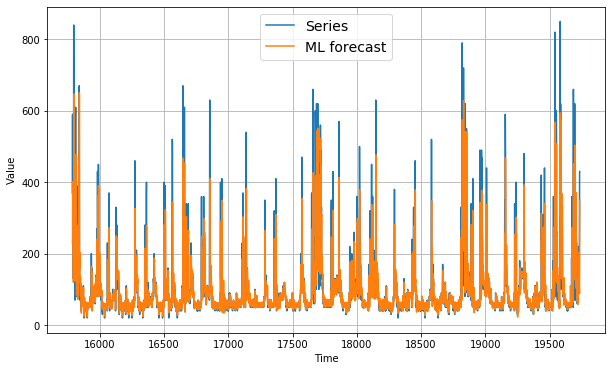

In [69]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, lin_forecast, label="ML forecast")

In [70]:
tf.keras.metrics.mse(x_valid, lin_forecast).numpy()

3727.4287

In [71]:
tf.keras.metrics.mae(x_valid, lin_forecast).numpy()

27.299923